## Problem Definition

### Using the available features of a house, predict its sale price.

## Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import plot_roc_curve, roc_curve
from sklearn.decomposition import PCA
sns.set(style='whitegrid', context='talk')

## Data Munging

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape


(1460, 81)

In [4]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df = df.drop(['Id'], axis=1)

In [8]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

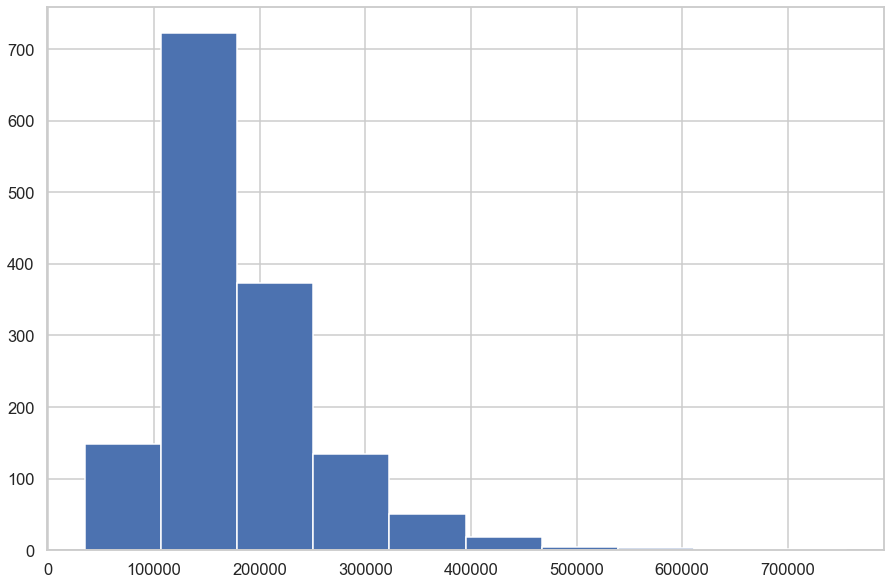

In [9]:
plt.figure(figsize = (15,10))
plt.hist(df.SalePrice);


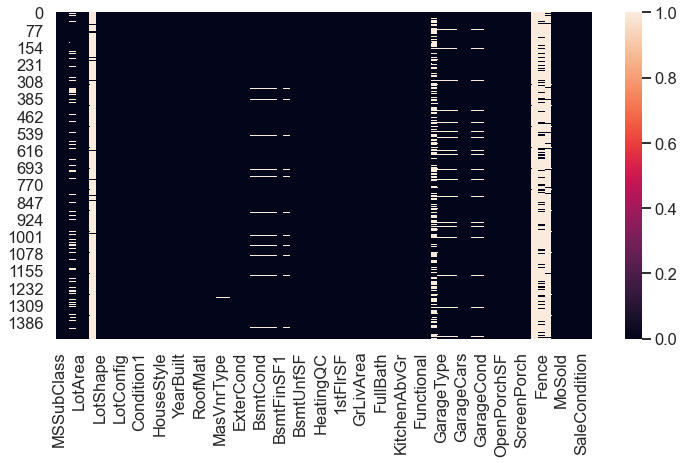

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), )
plt.show()

In [11]:
df_null = df.isnull().sum()
df_null[df_null != 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [12]:
df = df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','LotFrontage','MiscVal'], axis = 1)

## Explotary Data Analysis (EDA)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [14]:
target_vs_feature_corr = df.corr().SalePrice.sort_values(ascending = False)
target_vs_feature_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

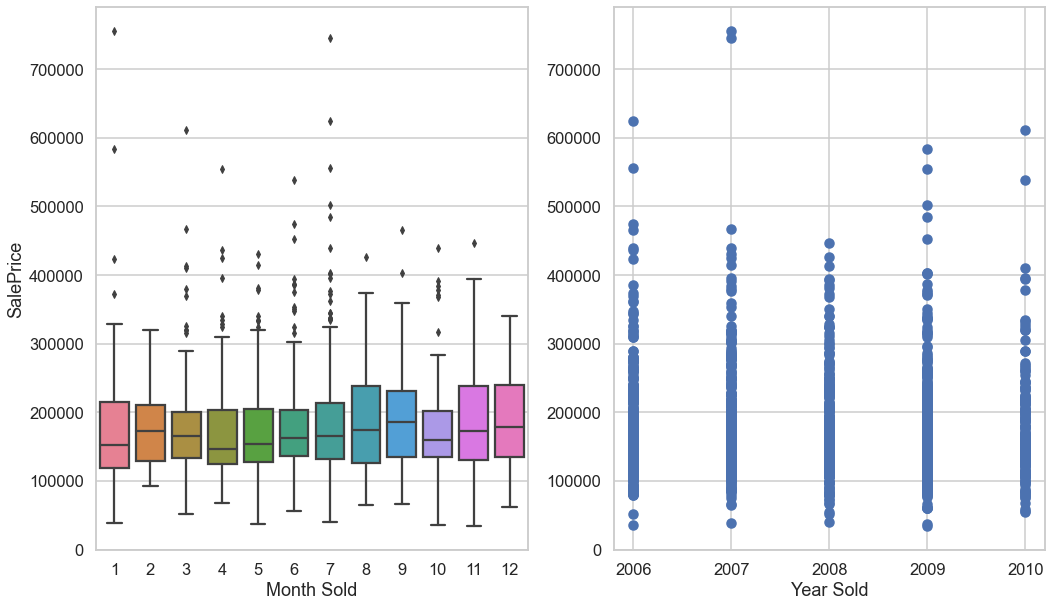

In [15]:
plt.figure(figsize = (17,10))
plt.subplot(1,2,1)
sns.boxplot(x = df.MoSold, y = df.SalePrice, palette = 'husl')
plt.xlabel("Month Sold")
plt.subplot(1,2,2)
plt.scatter(df.YrSold, df.SalePrice)
plt.xlabel("Year Sold")
plt.show()

**We can see that above two variables are not informative. Thus we will drop them.**

In [16]:
df = df.drop(["MoSold","YrSold"], axis = 1)

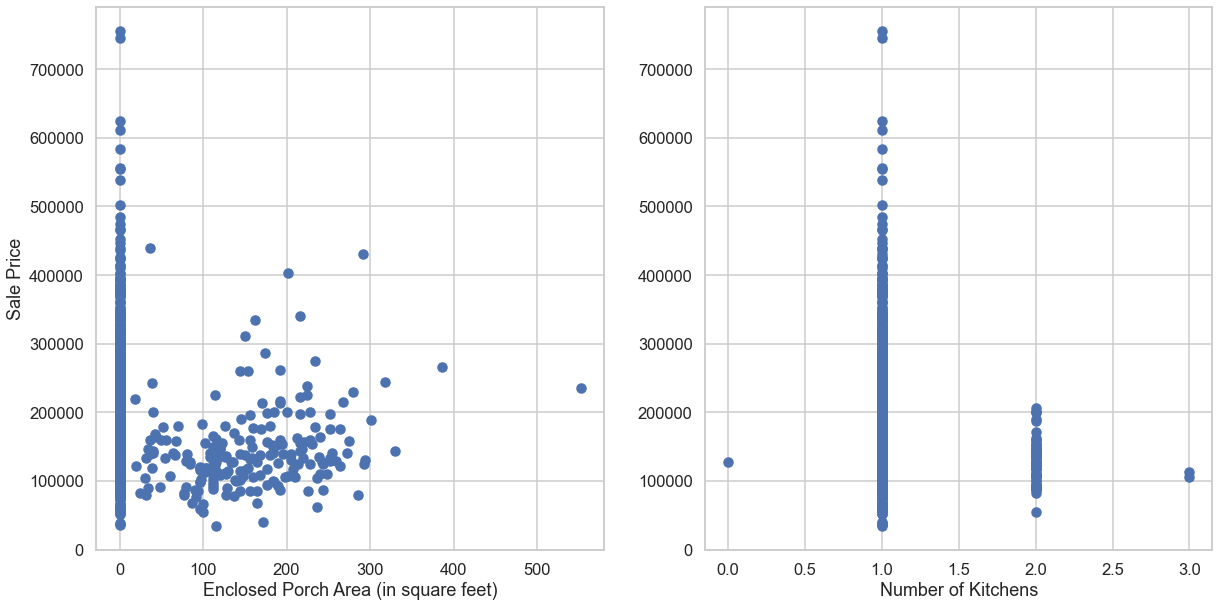

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(x='EnclosedPorch',y='SalePrice',data = df)
plt.xlabel('Enclosed Porch Area (in square feet)')
plt.ylabel("Sale Price")
plt.subplot(1,2,2)
plt.scatter(x='KitchenAbvGr',y='SalePrice',data = df)
plt.xlabel("Number of Kitchens")
plt.show()

**Above two variables seem to be informative, thus we will not drop them even if they have a negative correlation with the
target variable.**

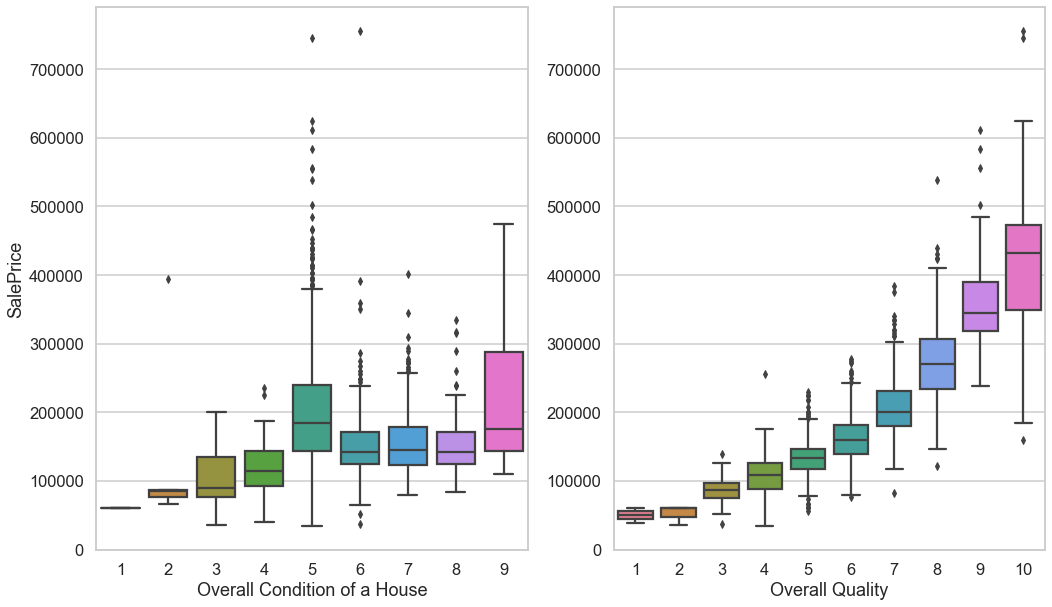

In [18]:
plt.figure(figsize = (17,10))
plt.subplot(1,2,1)
sns.boxplot(x = df.OverallCond, y = df.SalePrice, palette = 'husl')
plt.xlabel("Overall Condition of a House")
plt.subplot(1,2,2)
sns.boxplot(x = df.OverallQual, y = df.SalePrice, palette = 'husl')
plt.xlabel("Overall Quality")
plt.ylabel("")
plt.show()

**We can see that the variable related to overall "condition" of a house does not show what we expected, while the 
other variable related overall "quality" of a house give us what we expected. Thus we will not consider the former variable
in our analysis.**

In [19]:
df = df.drop("OverallCond", axis = 1)

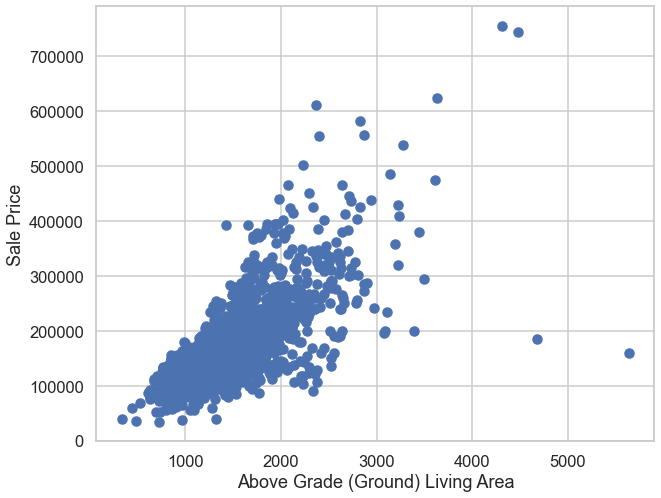

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(x='GrLivArea',y='SalePrice',data = df)
plt.xlabel('Above Grade (Ground) Living Area')
plt.ylabel('Sale Price')
plt.show()

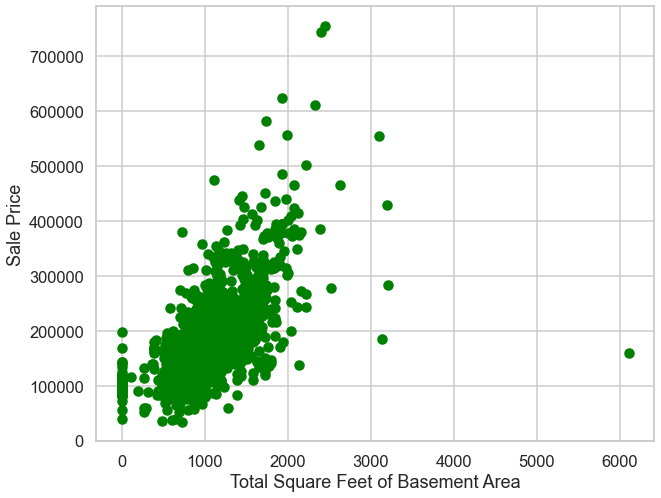

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(df.TotalBsmtSF, df.SalePrice, color = 'green')
plt.xlabel('Total Square Feet of Basement Area')
plt.ylabel('Sale Price')
plt.show()

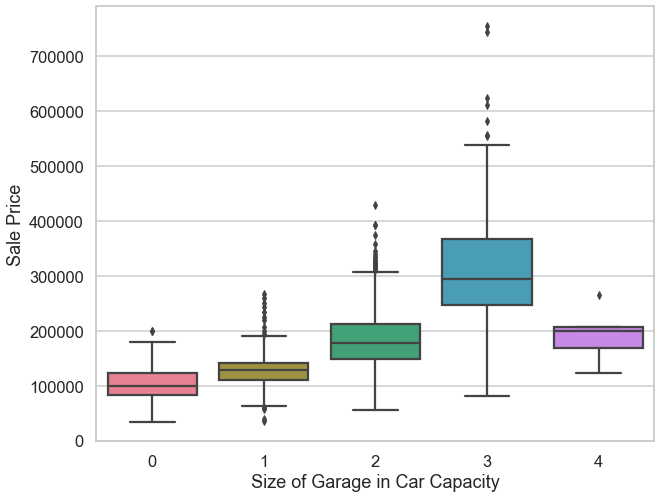

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(x = df.GarageCars, y  = df.SalePrice, palette = 'husl')
plt.xlabel('Size of Garage in Car Capacity')
plt.ylabel('Sale Price')
plt.show()

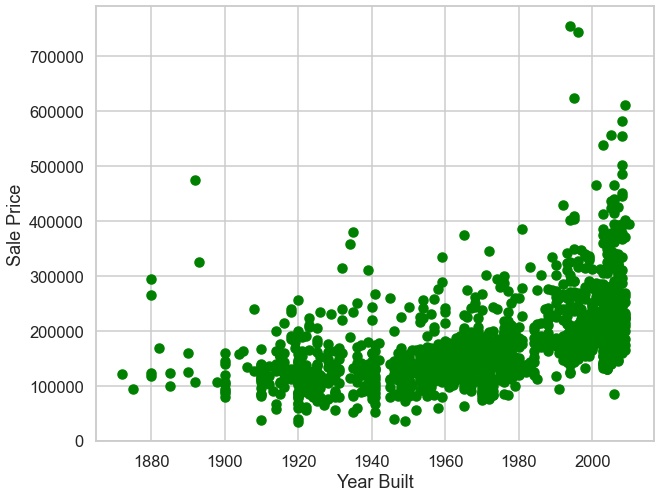

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(df.YearBuilt, df.SalePrice, color = 'green')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

## Splitting data into Train and Test Set

In [24]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75,
                                                   test_size = 0.25, 
                                                   random_state = 0)

In [26]:
X_train.shape

(1095, 69)

In [27]:
X_test.shape

(365, 69)

## Replacing Missing Values

In [28]:
df_null = df.isnull().sum()
df_null[df_null != 0].sort_values(ascending = False)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

In [29]:
cols_with_nulls = list(df_null[df_null != 0].index)

In [30]:
for col in cols_with_nulls:
    if df[col].dtype == 'O':
        X_train[col].replace(np.nan, X_train[col].mode()[0], inplace = True)
        X_test[col].replace(np.nan, X_test[col].mode()[0], inplace = True)
    else:
        X_train[col].replace(np.nan, X_train[col].median(), inplace = True)
        X_test[col].replace(np.nan, X_test[col].median(), inplace = True)


## Encoding and Scaling

In [31]:
num_features = X_train.select_dtypes(include = ['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include = ['object']).columns

In [32]:
num_features

Index(['MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea'],
      dtype='object')

In [33]:
cat_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

# Fit the encoders
ohe.fit(X_train[cat_features].values)

# Transform the data into X_train_nom
X_train_cat = ohe.transform(X_train[cat_features].values)

# transform test set
X_test_cat = ohe.transform(X_test[cat_features].values)

In [35]:
X_train_cat = pd.DataFrame(X_train_cat, columns = np.concatenate(ohe.categories_, axis=0))
X_train_cat.shape

(1095, 229)

In [36]:
X_test_cat = pd.DataFrame(X_test_cat, columns = np.concatenate(ohe.categories_, axis=0))
X_test_cat.shape

(365, 229)

In [37]:
scalar = StandardScaler()
scalar.fit(X_train[num_features].values)
X_train_num = scalar.transform(X_train[num_features].values)
X_test_num = scalar.transform(X_test[num_features].values)

In [38]:
X_train_num = pd.DataFrame(X_train_num, columns = num_features)
X_test_num = pd.DataFrame(X_test_num, columns = num_features)

In [39]:
X_train_num.shape

(1095, 31)

In [40]:
X_test_num.shape

(365, 31)

In [41]:
# Concatenate back all the data into one single data frame X_train
X_train = pd.concat([X_train_num, X_train_cat], axis = 1)
X_test = pd.concat([X_test_num, X_test_cat], axis = 1)
X_train.shape

(1095, 260)

## Model Training and Evaluation

We are going to use the following three classification algorithms for our dataset:

* Lasso Regression
* Random Forest
* Gradient Boost

In [42]:
np.random.seed(0)
model_LR = Lasso(alpha = 10)
model_RF = RandomForestRegressor(n_estimators = 1000)
model_GB = GradientBoostingRegressor(n_estimators = 1000)

model_LR.fit(X_train, y_train)
model_RF.fit(X_train, y_train)
model_GB.fit(X_train, y_train);

In [43]:
def internal_evaluation(models, X_train, y_train):
    output = {}
    cross_val = KFold(n_splits = 10, shuffle = True, random_state = 0)
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = cross_val, n_jobs = -1)
        output[model_name] = scores
    return output

In [44]:
models = {"Lasso": model_LR, "RF": model_RF, "GB": model_GB}

In [45]:
np.random.seed(0)
internal_performance = internal_evaluation(models, X_train, y_train)

In [46]:
arr = []
for model_name, res in internal_performance.items():
    arr.append(internal_performance[model_name])
    print(f"{model_name} RMSE average: {round(res.mean(),3)}")
    print(f"{model_name} RMSE std: {round(res.std(),3)}\n")

Lasso RMSE average: 0.85
Lasso RMSE std: 0.123

RF RMSE average: 0.84
RF RMSE std: 0.097

GB RMSE average: 0.829
GB RMSE std: 0.165



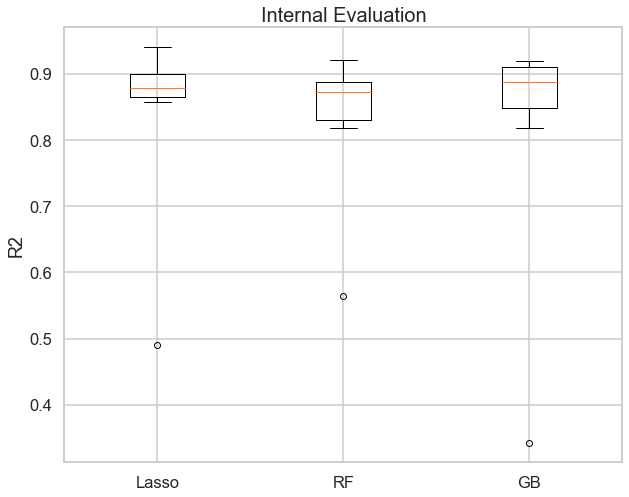

In [47]:
plt.figure(figsize = (10,8))
plt.boxplot(arr, labels = list(internal_performance.keys()))
plt.ylabel('R2')
plt.title("Internal Evaluation", fontsize = 20)
plt.show()

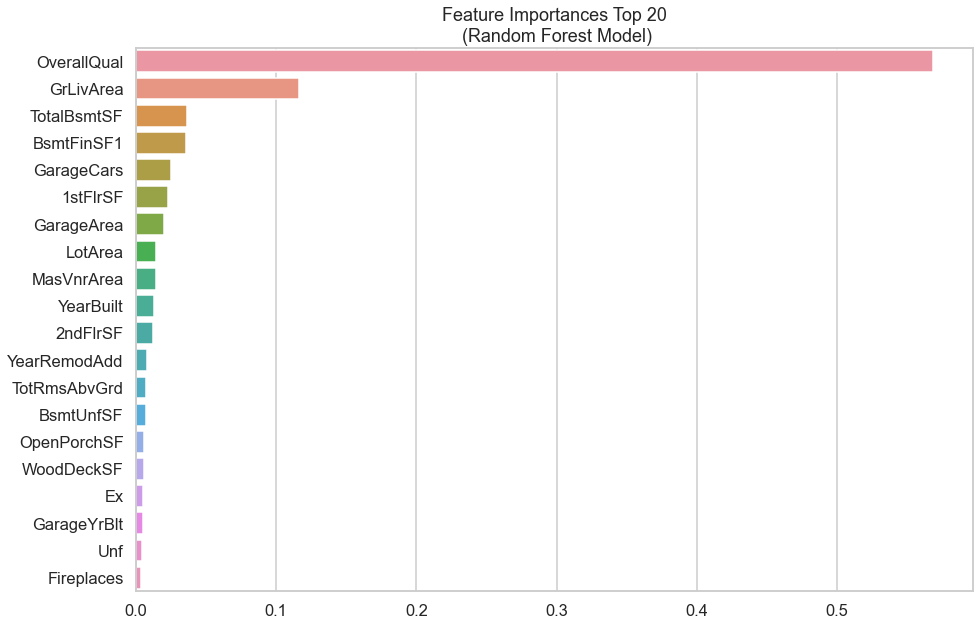

In [48]:
feature_importance = pd.Series(model_RF.feature_importances_, index = X_train.columns).sort_values(ascending=False)[0:20]
plt.figure(figsize = (15,10))
sns.barplot(x = feature_importance, y = feature_importance.index)
plt.title("Feature Importances Top 20\n (Random Forest Model)")
plt.show()

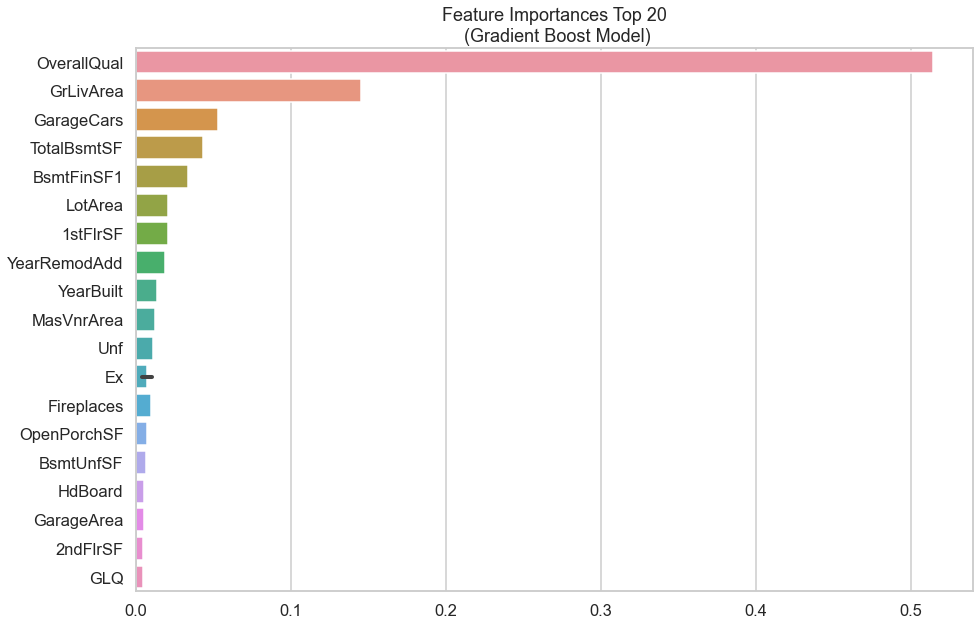

In [49]:
feature_importance = pd.Series(model_GB.feature_importances_, index = X_train.columns).sort_values(ascending=False)[0:20]
plt.figure(figsize = (15,10))
sns.barplot(x = feature_importance, y = feature_importance.index)
plt.title("Feature Importances Top 20\n (Gradient Boost Model)")
plt.show()

## Results

In [50]:
def model_metrics(models, X_test, y_test):
    
    results = pd.DataFrame(columns = ["Model","Metric","Value"])
    
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        result = pd.DataFrame({"Value":[
            r2_score(y_test,y_pred) * 100, mean_squared_error(y_test,y_pred,squared = False)],
            "Metric":["R2", "RMSE"],
            "Model":[model_name] * 2})
        results = results.append(result,ignore_index=True)
    return results

In [51]:
results = model_metrics(models, X_test, y_test)
results

,Model,Metric,Value
0,Lasso,R2,65.953163
1,Lasso,RMSE,47410.377282
2,Lasso,MAE,20630.889088
3,RF,R2,85.794878
4,RF,RMSE,30623.689531
5,RF,MAE,16834.144939
6,GB,R2,90.238490
7,GB,RMSE,25385.955623
8,GB,MAE,15866.031863


In [53]:
sns.set(style = "white")

In [54]:
def plot(metric):
    plt.figure(figsize = (10,8))
    model_names = list(models.keys())
    pos = np.arange(len(model_names))
    bars = plt.bar(pos, results[results['Metric'] == metric].Value, 
               align='center', linewidth=0, color='lightslategrey')

    plt.tick_params(labelleft=False)
    plt.xticks(pos, model_names, fontsize = 15)
    plt.ylabel(metric, fontsize = 15)

    bars[2].set_color('#1F77B4')


    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    
    for bar in bars:
        if metric == "R2":
            plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.1 * bar.get_height(), str(int(bar.get_height())) + "%", 
                 ha='center', color='w', fontsize=15)
        else:
            plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.1 * bar.get_height(), str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=15)

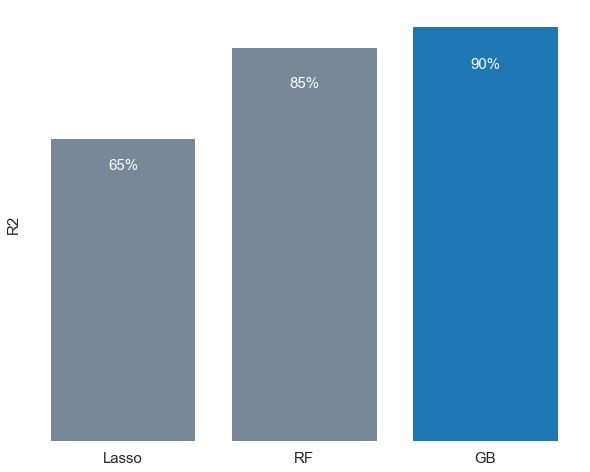

In [55]:
plot("R2")

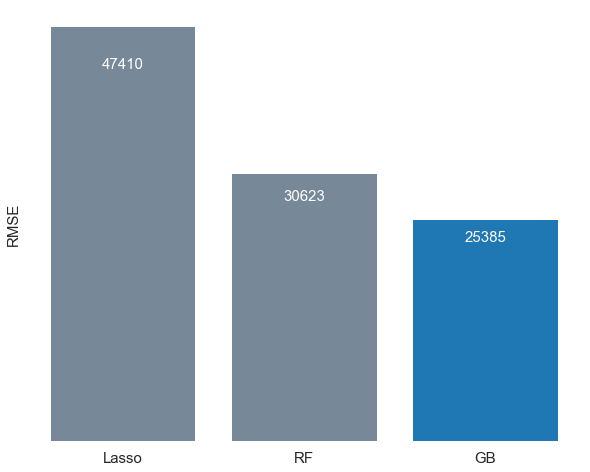

In [56]:
plot("RMSE")